In [2]:
import math
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

import os
from os import listdir
import shutil
from os.path import isfile, join

In [1]:
import math
import numpy as np
import pandas as pd


import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

import os, cv2, re, random
from os import listdir
import shutil
from os.path import isfile, join

In [2]:
%cd C:\Users\Varun\Documents\MSBA\Predictive\HW4\data2

C:\Users\Varun\Documents\MSBA\Predictive\HW4\data2


In [3]:
%pwd

'C:\\Users\\Varun\\Documents\\MSBA\\Predictive\\HW4\\data2'

In [4]:
wgt = 300
hgt = 300
dirtrain = 'train/'
dirtest = 'test/test/'
train_catdog = [dirtrain+i for i in os.listdir(dirtrain)] 
val_catdog = [dirtest+i for i in os.listdir(dirtest)]

def checkd(txt):
    return int(txt) if txt.isdigit() else txt
def n_keys(txt):
    return [checkd(x) for x in re.split('(\d+)',txt)]
train_catdog.sort(key=n_keys)
train_catdog = train_catdog[0:3000] + train_catdog[12500:15500] 
val_catdog.sort(key=n_keys)

In [7]:
def prep(i_list):
    x = [] 
    
    y =[] 
    for i in i_list:
        x.append(cv2.resize(cv2.imread(i),(wgt,hgt),interpolation=cv2.INTER_CUBIC))
    for j in i_list:
        
        if 'dog' in j:
            y.append(1)
        
        elif 'cat' in j:
            y.append(0)     
    
    return x, y

In [8]:
x, y = prep(train_catdog)

In [9]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=30)
train_samp = len(train_x)
test_samp = len(test_x)
batch_size = 10

In [11]:
mod = Sequential()


mod.add(Conv2D(32, (3, 3), input_shape=(wgt, hgt, 3)))
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Conv2D(32, (3, 3)))
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Conv2D(64, (3, 3)))
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Flatten())
mod.add(Dense(64))
mod.add(Activation('relu'))
mod.add(Dropout(0.5))
mod.add(Dense(1))
mod.add(Activation('sigmoid'))


mod.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [12]:
train_pregen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_pregen = ImageDataGenerator(shear_range=0.2,zoom_range=0.2, horizontal_flip=True)

In [13]:
train_gen = train_pregen.flow(np.array(train_x), train_y, batch_size=batch_size)
test_gen = test_pregen.flow(np.array(test_x), test_y, batch_size=batch_size)

In [14]:
results = mod.fit_generator(train_gen, steps_per_epoch=train_samp//batch_size,epochs=5,
    validation_data=test_gen, validation_steps=test_samp//batch_size)

C:\Users\Varun\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
480/480 [==============================] - 71s 137ms/step - loss: 3.5068 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.4967
Epoch 2/5
480/480 [==============================] - 66s 137ms/step - loss: 0.6932 - accuracy: 0.4837 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 3/5
480/480 [==============================] - 65s 136ms/step - loss: 0.6932 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 4/5
480/480 [==============================] - 65s 136ms/step - loss: 0.6932 - accuracy: 0.4958 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 5/5
480/480 [==============================] - 65s 136ms/step - loss: 0.6932 - accuracy: 0.4921 - val_loss: 0.6932 - val_accuracy: 0.4967


In [15]:
mod.save_weights('mod_wieghts.h5')
mod.save('modkeras.h5')

In [16]:
val_x, val_y = prep(val_catdog)

In [17]:
val_pregen = ImageDataGenerator()

In [18]:
val_gen = val_pregen.flow(np.array(val_x), batch_size=batch_size)
pred_prob = mod.predict_generator(val_gen, verbose=1)

C:\Users\Varun\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2030: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1250/1250 [==============================] - 12s 9ms/step


In [19]:
final_res = pd.DataFrame({'id': range(1, len(val_catdog) + 1), 'label':list(pred_prob)})

final_res['label'] = final_res['label'].map(lambda x: str(x).lstrip('[').rstrip(']')).astype(float)


In [20]:
%cd C:\Users\Varun\Documents\MSBA\Predictive\HW4\


C:\Users\Varun\Documents\MSBA\Predictive\HW4


In [21]:
final_res.to_csv('catdog.csv', index = False)

## Model Performance


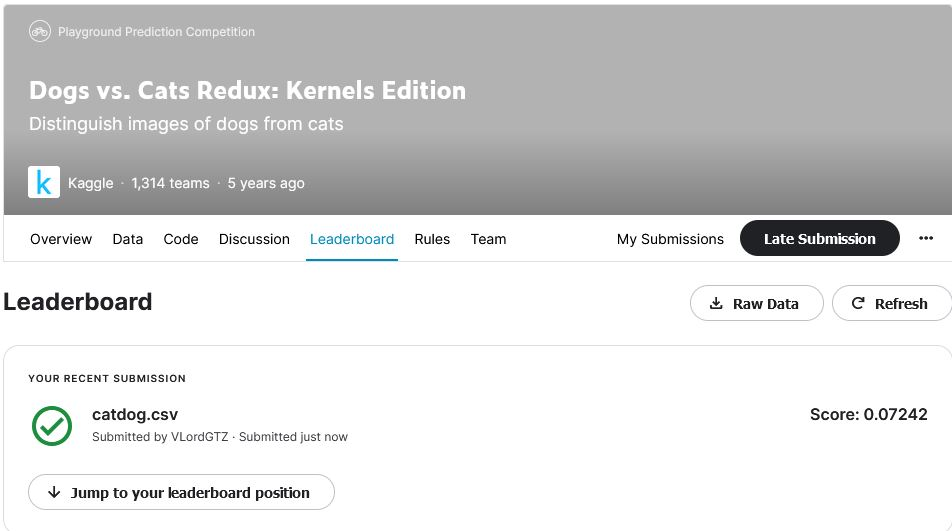

## Modeling Approach

In order to achieve the optimal score, I considered multiple options for my model settings and parameters. To reduce the inital intensity of the computation process, I sampled 6000 images from the training dataset, having 3000 dog pictures and 3000 cat pictures.  

For the model itself, I went with a sequential model with a series of linear stack layers and then utilizing the sigmoid function for the output layer.

When training the model, I decided to iterate over 5 epochs with batch sizes of 10 to prevent overfitting while ensuring accuracy on the test dataset. In addition, I implemented a sheer and zoom range of 0.2 for the training process using ImageDataGenerator. This helped factor in the variability of the potential images and improve the overall accuracy and score. This allowed for the model to be fitted in approximately 5 minutes via the fit_generator function in Keras and return a Kaggle score of 0.07242 after calculating the probability predictions on the test image set. 
